# Avacado Project


Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

#Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# solution:-prediction:average price

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [119]:
df= pd.read_csv("avocado.csv")

In [120]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [121]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [122]:
df.shape

(18249, 14)

In [123]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [124]:
#checking datatype
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [125]:
#GETTING INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


observations:-

In [126]:
#check null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

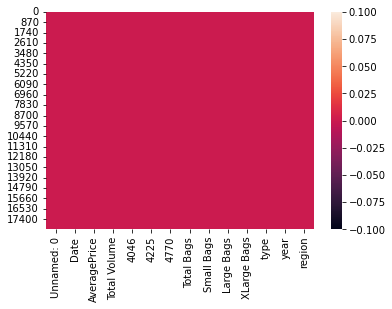

In [127]:
sns.heatmap(df.isnull())

In [128]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [129]:
#dropping unnamed column
df=df.drop(['Unnamed: 0'], axis=1)

In [130]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [131]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [132]:
# observations:-

# Multiple outliers in XLarge Bags,...
# Soem of columns ahs a large difference between mean and 50%tile, means data is right skewed as well having outliers

# Because of differnece between 75 % and max values, many features have outliers

In [133]:
df.skew()


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

As we can see that some of columns are highly skewed let us proceed with it later we will treat as per requirement



In [134]:
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str

In [135]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [136]:
df.drop(['year','Date'],axis=1,inplace=True)
df.shape

(18249, 14)

# EDA

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

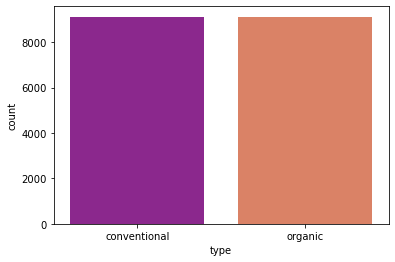

In [137]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='plasma')

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

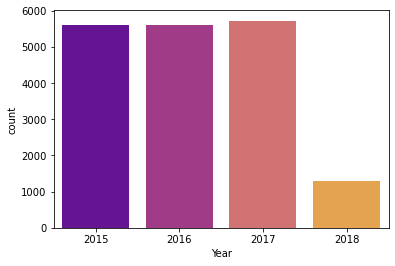

In [139]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df,palette='plasma')

<AxesSubplot:xlabel='month', ylabel='count'>

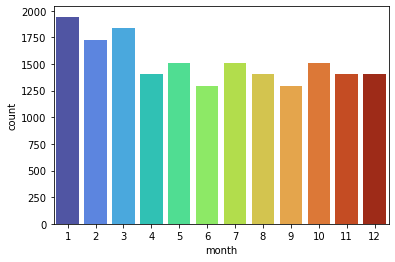

In [140]:
sns.countplot(x='month',data=df,palette='turbo')

<AxesSubplot:xlabel='day', ylabel='count'>

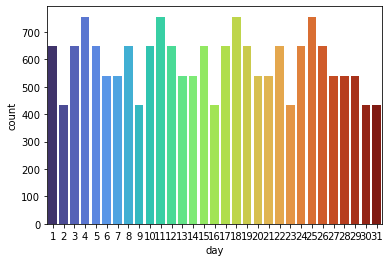

In [141]:

sns.countplot(x='day',data=df,palette='turbo')

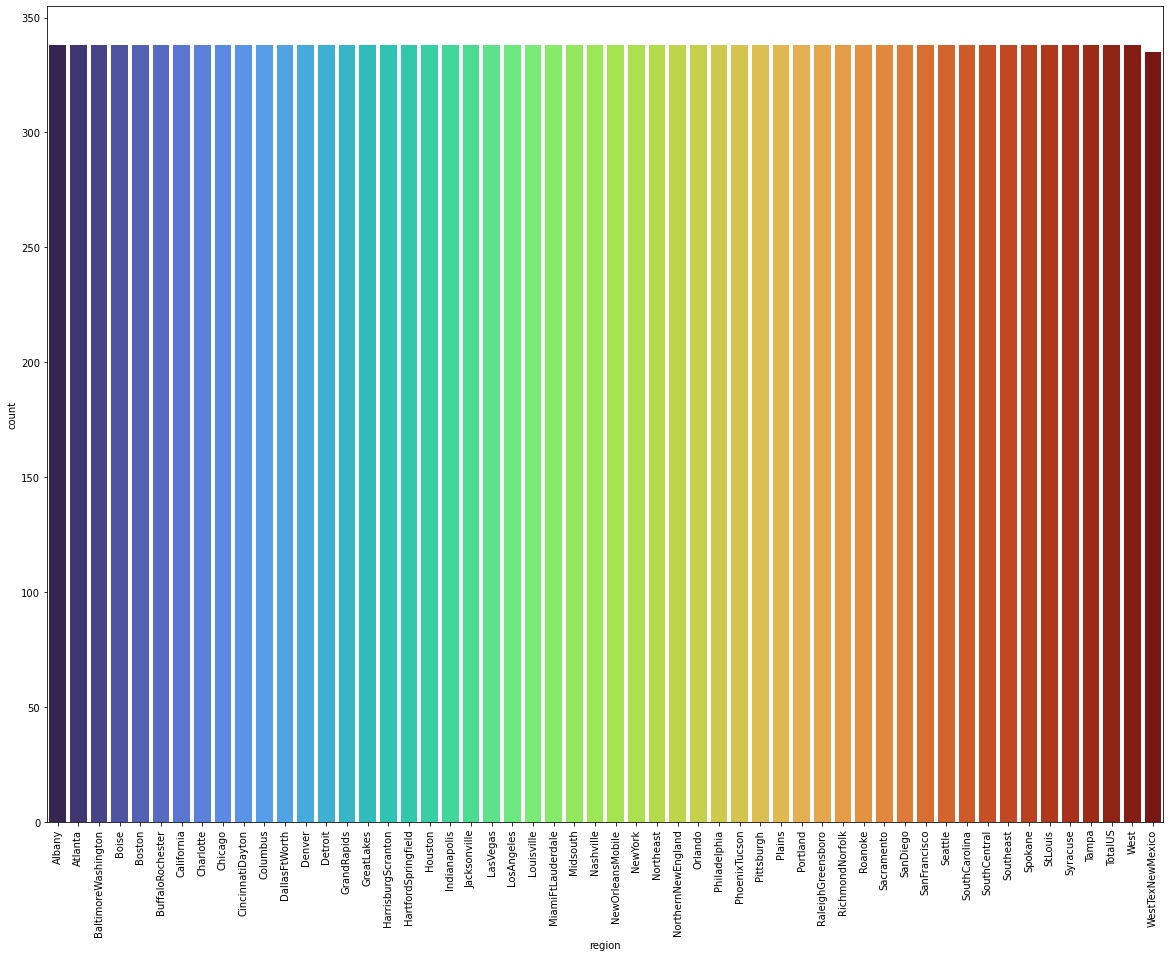

In [142]:
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=df,palette='turbo')
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x720 with 0 Axes>

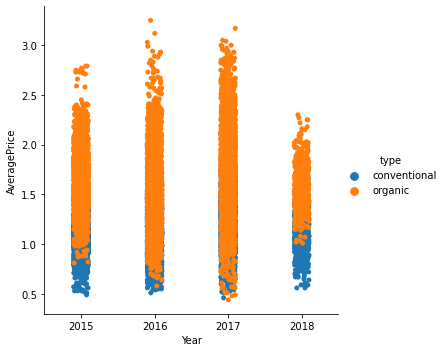

In [143]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df)
plt.show()

<Figure size 1080x720 with 0 Axes>

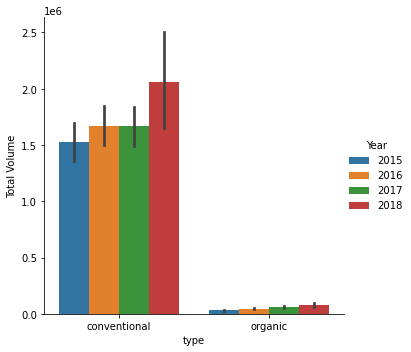

In [144]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df)
plt.show()

<Figure size 1080x720 with 0 Axes>

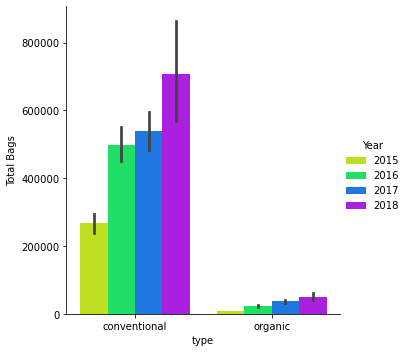

In [145]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hsv")
plt.show()

# checking correlation

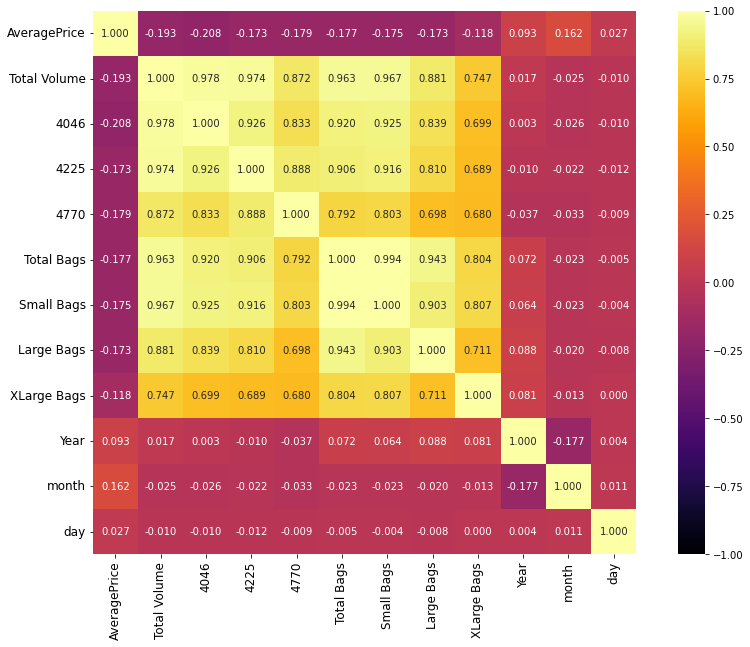

In [146]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As heatmap of correlation of our dataset df is displaying that many of columns are highly correleted to each other means columns like, 4046,4225,4770 are highly correlated with Total Volume in this case we have to drop these columns ,similarly small Bags,Large Bags and Xlarge Bags are highly correleted with Totla Bags these columns also needs to be dropped in order to secure from multicollearnity problems

In [147]:
#dropping columns
df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

In [148]:
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,5811.16,conventional,Albany,2015,12,6
4,1.28,51039.60,6183.95,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,9264.84,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,9394.11,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,10969.54,organic,WestTexNewMexico,2018,1,14


# OrdinalEncoding

In [149]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


# checking outliers

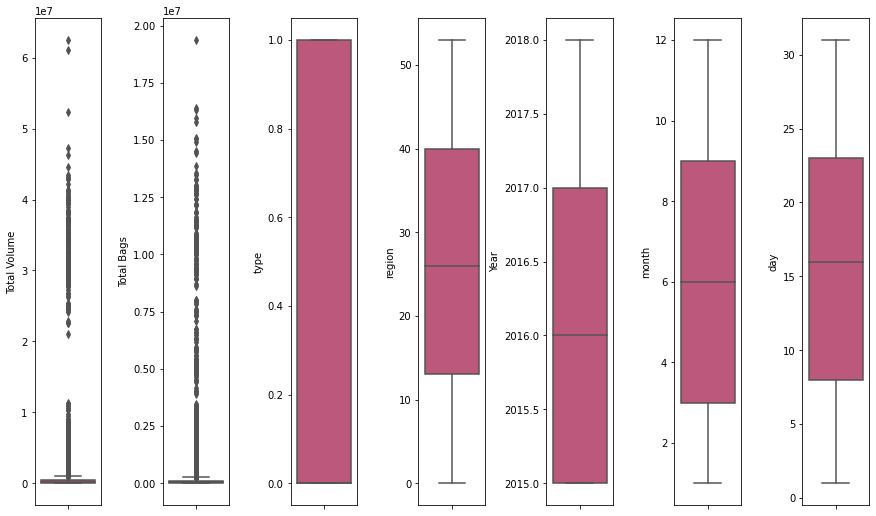

In [150]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# using zscore


In [151]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,0.188689,0.227716,0.234170,0.999836,1.700252,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.233350,0.999836,1.700252,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.234730,0.999836,1.700252,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.237096,0.999836,1.700252,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.236718,0.999836,1.700252,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.229301,1.000164,1.700811,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.233594,1.000164,1.700811,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.233463,1.000164,1.700811,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.231866,1.000164,1.700811,1.970504,1.464959,0.189449


In [152]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [153]:
df_new=df[(z<3).all(axis=1)]

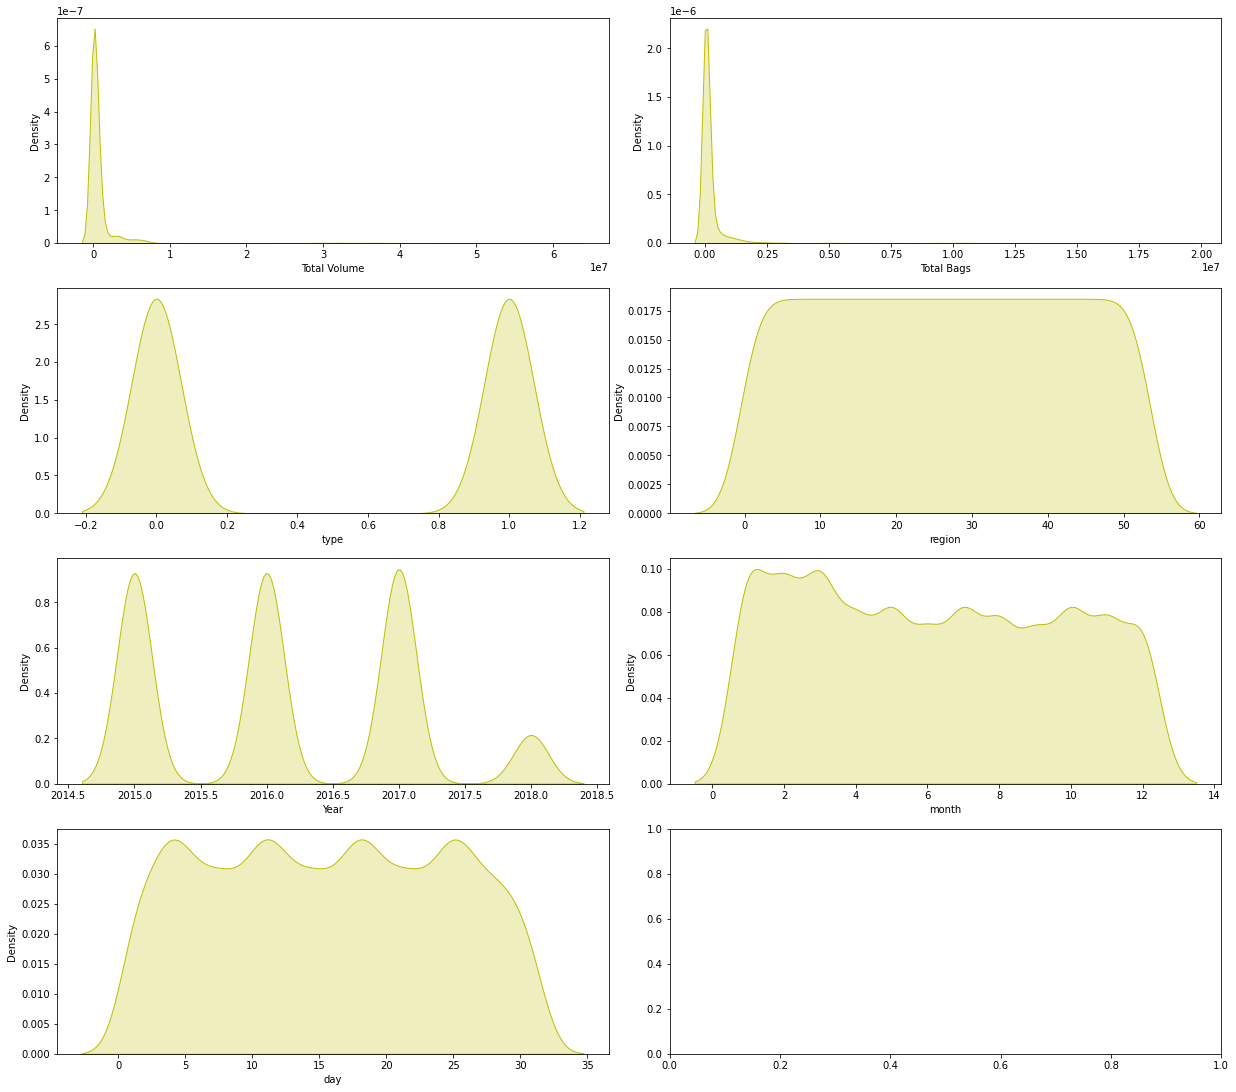

In [154]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(17,15))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [155]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [156]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [157]:
#Splitting Data into Two parts namely X (Features) and Y (Label)

x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

# scaling

In [158]:
scale=StandardScaler()

In [159]:
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Total Volume,Total Bags,type,region,Year,month,day
0,-0.107282,-0.494074,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-0.175949,-0.454761,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,0.158690,-0.523041,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,-0.017121,-0.672335,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-0.207558,-0.644845,-0.999836,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...
18244,-0.685006,-0.299689,1.000164,1.700811,1.970504,-1.181997,-1.328915
18245,-0.775077,-0.466102,1.000164,1.700811,1.970504,-1.464959,1.405803
18246,-0.778901,-0.459975,1.000164,1.700811,1.970504,-1.464959,0.608177
18247,-0.707798,-0.391424,1.000164,1.700811,1.970504,-1.464959,-0.189449


# modeling

In [160]:
#Finding best random state to build Regression Model

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5154450113185596 on Random State 672


In [161]:
#Train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)

In [162]:
def reg(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)
    
    #model fitting
    model.fit(X_train,Y_train)
    
    #predicting the model
    pred=model.predict(X_test)
    
    
    #Mean squared error
    print('mean square error',mean_squared_error(pred,Y_test))
    
    #R2_score
    r2=r2_score(pred,Y_test,multioutput="variance_weighted")*100
    print('r2_score',r2)
    
    #cv score
    cv_score=cross_val_score(model,x,y,cv=5).mean()*100
    print('cv score ',cv_score)
    #final score 
    result=r2-cv_score
    print('final score =',result)

In [163]:
model=LinearRegression()
reg(model,x,y)

mean square error 0.013474534166490987
r2_score -2.0916269978194624
cv score  14.362453555163937
final score = -16.4540805529834


In [164]:
#Random forest regressor
model=RandomForestRegressor()
reg(model,x,y)

mean square error 0.003003584730694982
r2_score 86.7090621502397
cv score  11.061263170410074
final score = 75.64779897982963


In [165]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

mean square error 0.012293510899851378
r2_score -1.8539240194234585
cv score  6.536398208780511
final score = -8.39032222820397


In [166]:
#support vector Regressor
model=SVR()
reg(model,x,y)

mean square error 0.009186826366427646
r2_score 47.28972121574025
cv score  -20.277219104851536
final score = 67.56694032059178


In [167]:
#dtr
model=DecisionTreeRegressor()
reg(model,x,y)

mean square error 0.006095022065881038
r2_score 77.85612101525375
cv score  -16.856931500290887
final score = 94.71305251554463


In [168]:
#Ridge
model=Ridge(alpha=1)
reg(model,x,y)

mean square error 0.013474675702694486
r2_score -2.111965950391159
cv score  14.365774566244587
final score = -16.47774051663575


In [169]:
#Lasso
model=Lasso(alpha=1)
reg(model,x,y)

mean square error 0.027812853228557987
r2_score -2.2564467257114354e+32
cv score  -103.77105535400972
final score = -2.2564467257114354e+32


In [170]:
#XGBRegressor
model=XGBRegressor()
reg(model,x,y)

mean square error 0.002715167855261281
r2_score 88.53691830582878
cv score  43.44985609350638
final score = 45.0870622123224


In [171]:
# Hyper parameter tuning for best ML model

#XGBRegressor
fmod_param={'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [172]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [173]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [200, 400, 600],
                         'n_jobs': [-2, -1, 1]})

In [174]:
GSCV.best_score_

0.5780035823390738

In [175]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 6, 'n_estimators': 200, 'n_jobs': -2}

In [176]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.3928301016917


In [177]:
#Saving our model

filename='avacado.pickle'
pickle.dump(Final_Model,open(filename,'wb'))

# 2. pridicting:region

In [182]:
#importing data
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [184]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# dropping unnessary column

In [185]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(18249, 13)

In [186]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# dealing with date

In [188]:
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str

In [189]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [190]:
df.drop(['year','Date'],axis=1,inplace=True)
df.shape

(18249, 14)

# correlation

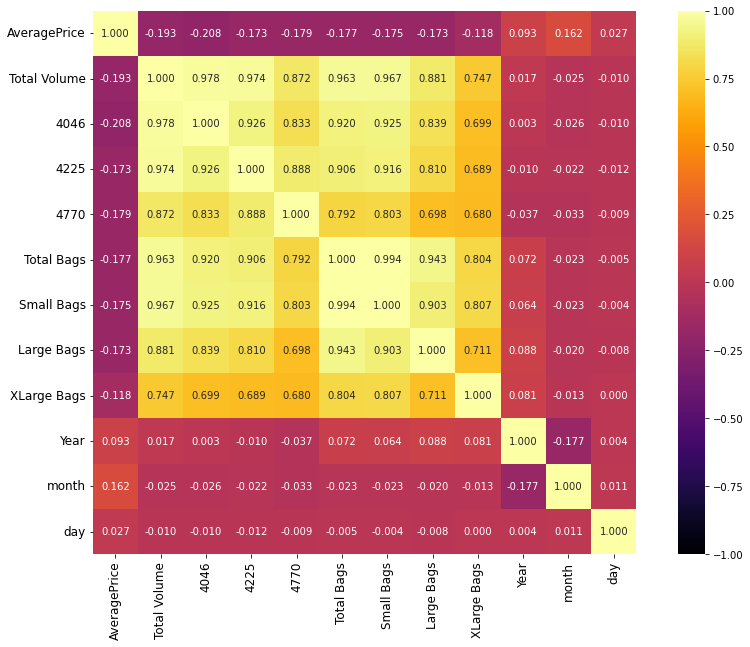

In [191]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As heatmap of correlation of our dataset df is displaying that many of columns are highly correleted to each other means columns like, 4046,4225,4770 are highly correlated with Total Volume in this case we have to drop these columns ,similarly small Bags,Large Bags and Xlarge Bags are highly correleted with Totla Bags these columns also needs to be dropped in order to secure from multicollearnity problems

# dropping columns

In [192]:
df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

# OrdinalEncoder

In [193]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


# boxplotting

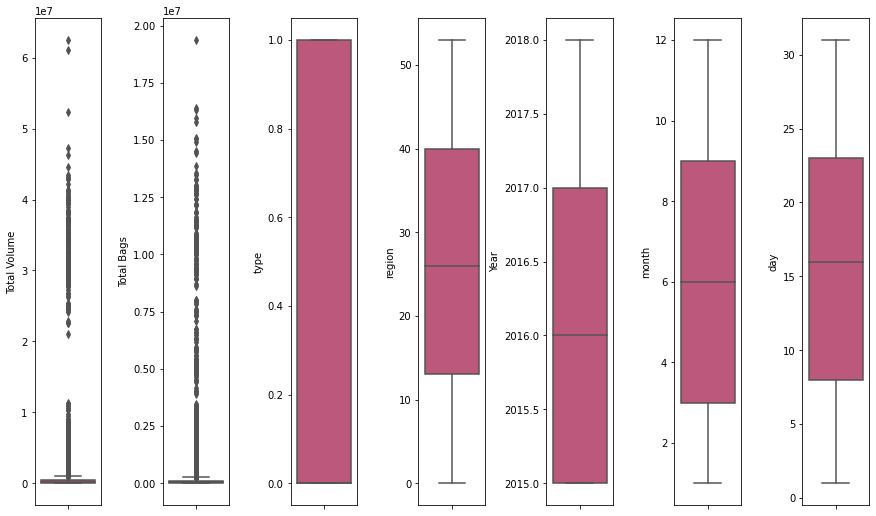

In [194]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# zscore

In [195]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,0.188689,0.227716,0.234170,0.999836,1.700252,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.233350,0.999836,1.700252,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.234730,0.999836,1.700252,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.237096,0.999836,1.700252,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.236718,0.999836,1.700252,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.229301,1.000164,1.700811,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.233594,1.000164,1.700811,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.233463,1.000164,1.700811,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.231866,1.000164,1.700811,1.970504,1.464959,0.189449


In [196]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [197]:
df_new=df[(z<3).all(axis=1)]

In [198]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [210]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [211]:
#Splitting Data into Two parts namely X (Features) and Y (Label)

x=df.drop('region',axis=1)
y=df['region']

In [212]:
scale=StandardScaler()

In [213]:
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)

x

,AveragePrice,Total Volume,Total Bags,type,Year,month,day
0,-0.111918,-0.107282,-0.494074,-0.999836,-1.221282,1.647632,1.291857
1,-0.060020,-0.175949,-0.454761,-0.999836,-1.221282,1.647632,0.494231
2,-1.255560,0.158690,-0.523041,-0.999836,-1.221282,1.647632,-0.303396
3,-0.801087,-0.017121,-0.672335,-0.999836,-1.221282,1.647632,-1.101022
4,-0.243636,-0.207558,-0.644845,-0.999836,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...
18244,0.623491,-0.685006,-0.299689,1.000164,1.970504,-1.181997,-1.328915
18245,0.805435,-0.775077,-0.466102,1.000164,1.970504,-1.464959,1.405803
18246,1.153743,-0.778901,-0.459975,1.000164,1.970504,-1.464959,0.608177
18247,1.279375,-0.707798,-0.391424,1.000164,1.970504,-1.464959,-0.189449


# smote

In [214]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
balance_X,balance_Y=smt.fit_resample(x,y)

In [217]:
balance_X.shape,balance_Y.shape

((18252, 7), (18252,))

# modeling


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(balance_X,balance_Y,random_state=i,test_size=.33)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    

Best accuracy is  0.2450199203187251 on Random State = 58


In [219]:
x_train,x_test,y_train,y_test= train_test_split(balance_X,balance_Y,random_state=58,test_size=.20)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [221]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [222]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 24.760339632977267
Confusion Matrix of  LogisticRegression()  is 
 [[14  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  5]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 79  1  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  1  0 ...  0  0  5]]
              precision    recall  f1-score   support

         0.0       0.19      0.18      0.19        77
         1.0       0.07      0.01      0.02        73
         2.0       0.41      0.37      0.39        65
         3.0       0.23      0.38      0.29        68
         4.0       0.17      0.18      0.18        67
         5.0       0.21      0.61      0.31        57
         6.0       0.42      0.53      0.47        75
         7.0       0.19      0.14      0.16        74
         8.0       0.40      0.52      0.45        60
         9.0       0.02      0.06      0.03        54
        10.0       0.27      0.14      0.19        69
        11.0       0.28      0.31      0.29        74
        12.0       0.24      0.

Accuracy_Score of  SVC() is 30.375239660367022
Confusion Matrix of  SVC()  is 
 [[45  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  7]
 [ 0  1 37 ...  0  0  1]
 ...
 [ 0  0  0 ... 79  1  0]
 [ 0  0  0 ...  0 45  0]
 [ 0  3  4 ...  0  0 12]]
              precision    recall  f1-score   support

         0.0       0.48      0.58      0.53        77
         1.0       0.11      0.07      0.08        73
         2.0       0.44      0.57      0.50        65
         3.0       0.35      0.21      0.26        68
         4.0       0.20      0.18      0.19        67
         5.0       0.29      0.51      0.37        57
         6.0       0.39      0.32      0.35        75
         7.0       0.10      0.12      0.11        74
         8.0       0.65      0.50      0.57        60
         9.0       0.18      0.31      0.23        54
        10.0       0.16      0.06      0.09        69
        11.0       0.21      0.32      0.25        74
        12.0       0.37      0.24      0.29        75
       

Accuracy_Score of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 54.94385099972611
Confusion Matrix of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_

Accuracy_Score of  BaggingClassifier() is 54.0399890440975
Confusion Matrix of  BaggingClassifier()  is 
 [[56  0  0 ...  0  0  0]
 [ 0 25  1 ...  0  0  4]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  4 ...  0  0 28]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74        77
         1.0       0.35      0.34      0.34        73
         2.0       0.70      0.72      0.71        65
         3.0       0.53      0.51      0.52        68
         4.0       0.58      0.63      0.60        67
         5.0       0.41      0.58      0.48        57
         6.0       0.76      0.76      0.76        75
         7.0       0.48      0.64      0.55        74
         8.0       0.67      0.78      0.72        60
         9.0       0.31      0.46      0.37        54
        10.0       0.23      0.25      0.24        69
        11.0       0.52      0.59      0.56        74
        12.0       0.57      0.49  

In [223]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,balance_X,balance_Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 24.760339632977267
cross Validation accuracy score of  LogisticRegression()  is  19.77321281840592
**************************************************
Accuracy_Score of  RidgeClassifier() is 8.271706381813202
cross Validation accuracy score of  RidgeClassifier()  is  7.6046104838982
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 46.535195836757055
cross Validation accuracy score of  DecisionTreeClassifier()  is  23.925791019911976
**************************************************
Accuracy_Score of  SVC() is 30.375239660367022
cross Validation accuracy score of  SVC()  is  24.62172795593626
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 13.201862503423719
cross Validation accuracy score of  KNeighborsClassifier()  is  16.452700892605893
**************************************************
Accuracy_Score of  RandomForestClassifier() is 53.5743631881

# I am choosing Bagging classifier for final modeling

In [224]:
#Hypertuning:
params = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [226]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(Bag_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500]},
             verbose=2)

In [227]:
GCV.best_estimator_

BaggingClassifier(max_features=5, max_samples=0.5, n_estimators=300)

In [228]:
GCV.best_params_

{'max_features': 5, 'max_samples': 0.5, 'n_estimators': 300}

In [230]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.5456039441248973

# Save the file

In [231]:
import joblib
joblib.dump(GCV.best_estimator_,'Avacado.pkl')

['Avacado.pkl']